## Example 1: Univariate Outliers

1. Univariate Outliers
Definition: A univariate outlier is an outlier that occurs in a single variable (or feature). This is the simplest case, where the data is examined in one dimension (one variable), and any value that is far from the others is considered an outlier.

Detection:

Univariate outliers can be easily detected by looking at basic statistics (mean, median, standard deviation) or visualizations like histograms or boxplots.
Statistical techniques like Z-score or IQR (Interquartile Range) can also help detect univariate outliers.
Example: In a dataset of human ages, where most values are between 20 and 50, a value of 120 years would be a univariate outlier.

Example in Python (using a boxplot):

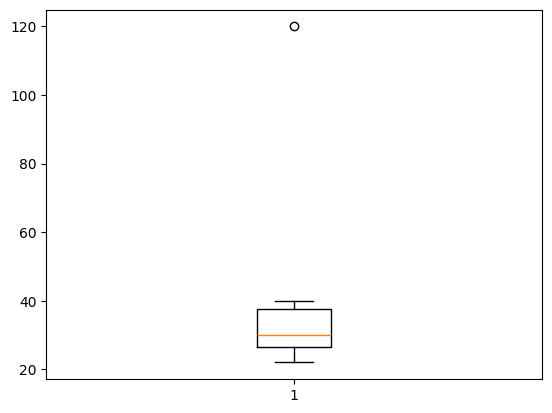

In [7]:
import numpy as np
import matplotlib.pyplot as plt

ages = [22, 25, 30, 35, 40, 28, 120]  # 120 is a univariate outlier
plt.boxplot(ages)
plt.show()


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a dataset of heights (in cm)
np.random.seed(0) 
heights = np.random.normal(170, 10, 100)  # Mean height of 170 cm with a std deviation of 10 cm
heights = np.append(heights, [200, 220])  # Adding two outliers
heights
# # Create a DataFrame
data = pd.DataFrame({'Heights': heights})
data.describe()

,Heights
count,102.000000
mean,171.370667
std,11.519422
min,144.470102
25%,163.795460
50%,171.242936
75%,177.733772
max,220.000000


### Example Breakdown
##### In this case:

##### The mean (average height) is 170 cm, so most of the generated heights will be close to 170 cm.
##### The standard deviation is 10 cm, meaning the heights will generally range within 10 cm above or below the mean.
##### About 68% of the heights will fall between 160 cm and 180 cm (i.e., mean ± 1 standard deviation).
##### About 95% of the heights will fall between 150 cm and 190 cm (i.e., mean ± 2 standard deviations).

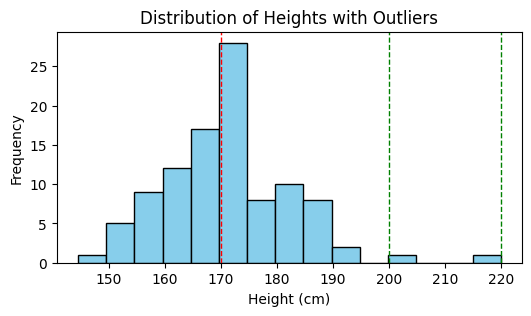

In [4]:
import matplotlib.pyplot as plt

# Create a histogram of the heights
plt.figure(figsize=(6, 3))
plt.hist(heights, bins=15, color='skyblue', edgecolor='black')
plt.axvline(170, color='red', linestyle='dashed', linewidth=1)  # Mean line
plt.axvline(200, color='green', linestyle='dashed', linewidth=1)  # Outlier line
plt.axvline(220, color='green', linestyle='dashed', linewidth=1)  # Outlier line
plt.title('Distribution of Heights with Outliers')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()


## Step 2: Visualize the Data with a Box Plot

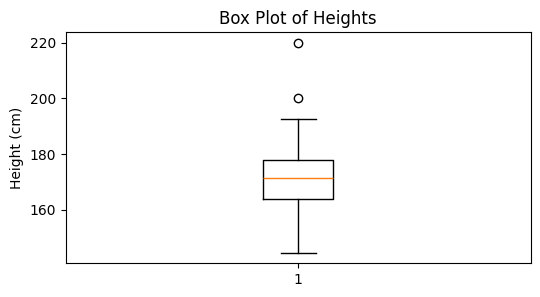

In [5]:
# Create a box plot to visualize outliers
plt.figure(figsize=(6, 3))
plt.boxplot(data['Heights'])
plt.title('Box Plot of Heights')
plt.ylabel('Height (cm)')
plt.show()


## Step 3: Detect Outliers Using the IQR Method

In [6]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Heights'].quantile(0.25)
Q3 = data['Heights'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Heights'] < lower_bound) | (data['Heights'] > upper_bound)]
outliers

,Heights
100,200.0
101,220.0


# Example 2: Multivariate Outliers

Multivariate outliers consider multiple variables together, and a point may only appear anomalous in the context of its relationship with other variables.

In [7]:
# Generate a dataset of student grades in two subjects
np.random.seed(0)
subject1 = np.random.normal(70, 10, 100)  # Mean grade of 70 with std deviation of 10
subject2 = np.random.normal(75, 10, 100)  # Mean grade of 75 with std deviation of 10

# Adding a multivariate outlier
subject1 = np.append(subject1, [40])  # A low grade in subject1
subject2 = np.append(subject2, [95])  # A high grade in subject2

# Create a DataFrame
grades = pd.DataFrame({'Subject1': subject1, 'Subject2': subject2})
grades.describe()

,Subject1,Subject2
count,101.000000,101.000000
mean,70.295129,76.010029
std,10.528646,10.521209
min,40.000000,52.765968
25%,63.275396,67.552452
50%,70.665172,75.318306
75%,77.290906,83.568306
max,92.697546,98.831448


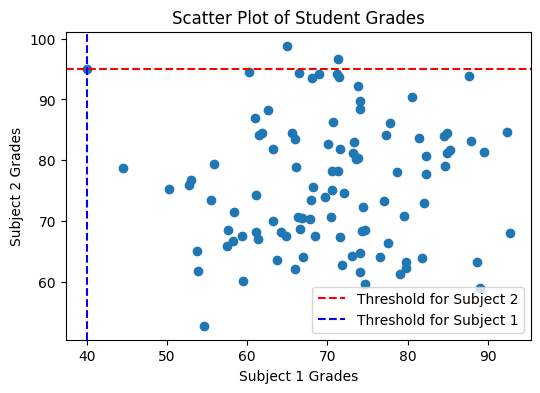

In [10]:
# Create a scatter plot to visualize the data
plt.figure(figsize=(6, 4))
plt.scatter(grades['Subject1'], grades['Subject2'])
plt.title('Scatter Plot of Student Grades')
plt.xlabel('Subject 1 Grades')
plt.ylabel('Subject 2 Grades')
plt.axhline(95, color='red', linestyle='--', label='Threshold for Subject 2')
plt.axvline(40, color='blue', linestyle='--', label='Threshold for Subject 1')
plt.legend()
plt.show()


In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset
data = np.array([10, 12, 12, 13, 12, 13, 12, 100, 12, 13, 11, 12, 13])

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Set the threshold (k=2)
k = 2
lower_bound = mean - k * std_dev
upper_bound = mean + k * std_dev

# Identify outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Output results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers:", outliers)


Mean: 18.846153846153847
Standard Deviation: 23.441731866468576
Lower Bound: -28.037309886783305
Upper Bound: 65.729617579091
Outliers: [100]


# Global Outliers

The term "Global Outliers" refers to outliers that are identified within the context of the entire dataset, rather than just a specific subset or local region of the data. Here’s a breakdown of why they are called "global" outliers:
Example of Local vs. Global:

Imagine a dataset of daily temperatures across different cities. A temperature that is extremely high in one city might not be considered an outlier if you only look at that city’s data. However, if you consider temperatures from all cities, that same value may be flagged as a global outlier because it’s much higher than the majority of temperatures across all locations.

In [8]:
import numpy as np
import pandas as pd
from scipy import stats

# Sample data: Daily temperatures in Celsius
data = [28, 30, 29, 27, 28, 100, 30, 28, 29, 27]

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['Temperature'])
df

,Temperature
0,28
1,30
2,29
3,27
4,28
5,100
6,30
7,28
8,29
9,27


Explanation:
1. stats.zscore(df['Temperature']):
The zscore() function from the scipy.stats module calculates the Z-score for each value in the df['Temperature'] column.

A Z-score tells you how far a particular data point is from the mean of the dataset in terms of standard deviations.

Mean: The average of the data points.
Standard deviation: A measure of how spread out the numbers are.
2. np.abs(...):
np.abs() is a function from the numpy library that returns the absolute value of each Z-score.

The Z-score can be positive or negative:

A positive Z-score means the value is above the mean.
A negative Z-score means the value is below the mean.
Using np.abs() ensures that we are only concerned with how far the value is from the mean, ignoring whether it's above or below. For example, a Z-score of -3 or +3 both represent data points that are 3 standard deviations away from the mean, so we treat them similarly.

Example:
If the temperatures are [28, 30, 29, 27, 100]:

The mean temperature might be around 42.8 (average).
The Z-score of 100 will be high (far above the mean).
The Z-score of 27 will be much lower (closer to the mean).
For a Z-score greater than 3 (for example), the value is likely an outlier.

In [11]:
# Z-Score Method to detect outliers
z_scores = np.abs(stats.zscore(df['Temperature']))
print(z_scores)

0    0.353645
1    0.260581
2    0.307113
3    0.400178
4    0.353645
5    2.996678
6    0.260581
7    0.353645
8    0.307113
9    0.400178
Name: Temperature, dtype: float64


In [12]:
df['Z-Score'] = z_scores
df

,Temperature,Z-Score
0,28,0.353645
1,30,0.260581
2,29,0.307113
3,27,0.400178
4,28,0.353645
5,100,2.996678
6,30,0.260581
7,28,0.353645
8,29,0.307113
9,27,0.400178


In [13]:
# Define a threshold for Z-score (usually 3)
z_outliers = df[df['Z-Score'] > 3]
z_outliers

,Temperature,Z-Score


In [14]:
# Interquartile Range (IQR) Method to detect outliers
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
IQR


np.float64(1.75)

In [15]:
# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
lower_bound


np.float64(25.375)

In [16]:
upper_bound = Q3 + 1.5 * IQR
upper_bound


np.float64(32.375)

In [18]:
iqr_outliers = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]
iqr_outliers


,Temperature,Z-Score
5,100,2.996678


In [19]:
# Display results
print("Data:\n", df)
print("\nOutliers detected using Z-Score Method:\n", z_outliers)
print("\nOutliers detected using IQR Method:\n", iqr_outliers)

Data:
    Temperature   Z-Score
0           28  0.353645
1           30  0.260581
2           29  0.307113
3           27  0.400178
4           28  0.353645
5          100  2.996678
6           30  0.260581
7           28  0.353645
8           29  0.307113
9           27  0.400178

Outliers detected using Z-Score Method:
 Empty DataFrame
Columns: [Temperature, Z-Score]
Index: []

Outliers detected using IQR Method:
    Temperature   Z-Score
5          100  2.996678


Z-score Method:
We calculate the Z-score for each temperature. If the Z-score is greater than 3, it's flagged as an outlier.
IQR Method:
We calculate the IQR (the range between the 25th and 75th percentiles).
Outliers are any values that fall below 
Q1−1.5×IQR or above Q3+1.5×IQR.

Explanation of Output:
Z-Score Output:
The temperature 100 has a Z-score of 3.80, which is greater than 3. Hence, it's considered an outlier.
IQR Output:
Using the IQR method, the temperature 100 is also flagged as an outlier because it falls outside the expected range of temperatures.

# Handling outliers is an important step in data analysis

Example:
If you have a dataset of temperatures, and you find a temperature of 100°C, which is clearly an outlier, you can choose to remove it.

In [20]:
df_cleaned = df[(df['Temperature'] < upper_bound) & (df['Temperature'] > lower_bound)]
df_cleaned

,Temperature,Z-Score
0,28,0.353645
1,30,0.260581
2,29,0.307113
3,27,0.400178
4,28,0.353645
6,30,0.260581
7,28,0.353645
8,29,0.307113
9,27,0.400178


# 3. Transform Data
Sometimes, transforming the data can help mitigate the impact of outliers. Common transformations include:

Logarithmic Transformation: Useful for positively skewed data.
Square Root Transformation: Reduces the effect of larger values.
Box-Cox Transformation: A family of power transformations that stabilize variance.

Example:
Using a logarithmic transformation:

In [22]:
df['Log_Temperature'] = np.log(df['Temperature'])
df

,Temperature,Z-Score,Log_Temperature
0,28,0.353645,3.332205
1,30,0.260581,3.401197
2,29,0.307113,3.367296
3,27,0.400178,3.295837
4,28,0.353645,3.332205
5,100,2.996678,4.605170
6,30,0.260581,3.401197
7,28,0.353645,3.332205
8,29,0.307113,3.367296
9,27,0.400178,3.295837


# 4. Impute Outliers
Instead of removing outliers, you can replace them with a more typical value, such as:

The mean or median of the dataset.
A value based on some other logic (e.g., the nearest non-outlier value).
Example:
If you have an outlier temperature of 100°C, you might replace it with the median temperature of the dataset:

In [24]:
median_temp = df['Temperature'].median()
df.loc[df['Temperature'] > upper_bound, 'Temperature'] = median_temp
df

,Temperature,Z-Score,Log_Temperature
0,28.0,0.353645,3.332205
1,30.0,0.260581,3.401197
2,29.0,0.307113,3.367296
3,27.0,0.400178,3.295837
4,28.0,0.353645,3.332205
5,28.5,2.996678,4.605170
6,30.0,0.260581,3.401197
7,28.0,0.353645,3.332205
8,29.0,0.307113,3.367296
9,27.0,0.400178,3.295837


In [25]:
import pandas as pd

data = [28, 30, 29, 27, 100]  # Example temperatures
df = pd.DataFrame(data, columns=['Temperature'])

# Calculate the median temperature
median_temp = df['Temperature'].median()
print(median_temp)  # Output: 29.0


29.0


In [29]:
print(upper_bound)
df.loc[df['Temperature'] > upper_bound, 'Temperature'] = median_temp


32.375


In [27]:
df

,Temperature
0,28
1,30
2,29
3,27
4,29


# Step-by-Step Implementation
##### Cluster the Data: Use K-means clustering to group the data points.
##### Calculate Cluster Means: Calculate the mean of each cluster.
##### Threshold Initialization: Set a threshold value for determining outliers.
##### Distance Calculation: Measure the distance of a new test data point from the cluster means.
##### Determine Outlier Status: Check if the distance exceeds the threshold.